In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [42]:
def draw_bbox(img,bbox,color=[0,0,255]):
    x_start, y_start, x_end, y_end = np.round(bbox).astype(int)

    cv2.line(img, (x_start, y_start), (x_end, y_start), color, 3)
    cv2.line(img, (x_start, y_start), (x_start, y_end), color, 3)
    cv2.line(img, (x_end, y_start), (x_end, y_end), color, 3)
    cv2.line(img, (x_start, y_end), (x_end, y_end), color, 3)

In [55]:
def get_crop_indices(bbox,img_size):
    aspect_gt = img_size[0]/img_size[1]
    aspect_bbox = (bbox[2] - bbox[0])/(bbox[3] - bbox[1])

    target_percent = 0.7

    relative_margin = (1 - target_percent) / 2

    old_w = (bbox[2] - bbox[0])
    old_h = (bbox[3] - bbox[1])


    if aspect_gt > aspect_bbox:

        new_bbox_y_1 = bbox[1] - (relative_margin * old_h)  
        new_bbox_y_2 = bbox[3] + (relative_margin * old_h) 

        new_w = (new_bbox_y_2 - new_bbox_y_1) * aspect_gt
        
        center = (bbox[0] + bbox[2]) / 2
        new_bbox_x_1 = center - new_w / 2
        new_bbox_x_2 = center + new_w / 2

    else:
        new_bbox_x_1 = bbox[0] - (relative_margin * old_w)  
        new_bbox_x_2 = bbox[2] + (relative_margin * old_w)

        new_h = (new_bbox_x_2 - new_bbox_x_1) / aspect_gt
        
        center = (bbox[1] + bbox[3]) / 2
        new_bbox_y_1 = center - new_h / 2
        new_bbox_y_2 = center + new_h / 2
    
    add_offset = np.array([img_size[0],img_size[1],img_size[0],img_size[1]])
    return np.round([new_bbox_x_1,new_bbox_y_1,new_bbox_x_2,new_bbox_y_2]).astype(int) + add_offset

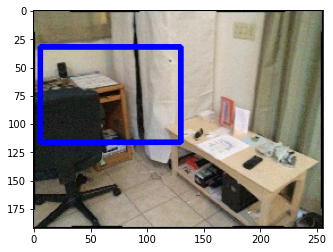

(576, 768, 3)
[243 206 405 326]


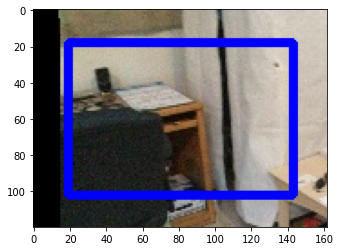

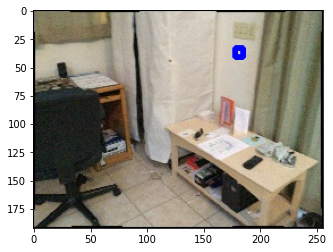

(576, 768, 3)
[431 224 444 234]


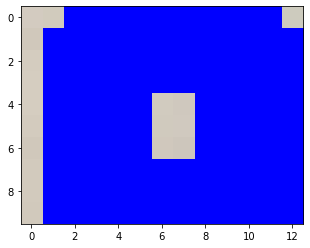

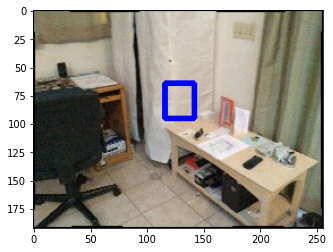

(576, 768, 3)
[358 251 412 292]


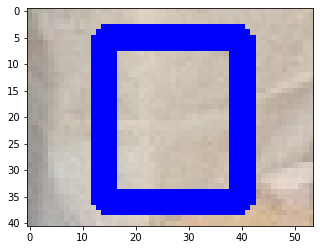

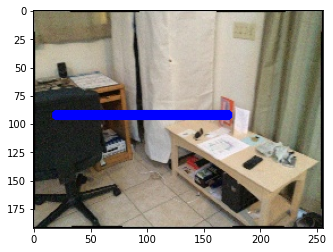

(576, 768, 3)
[252 209 452 359]


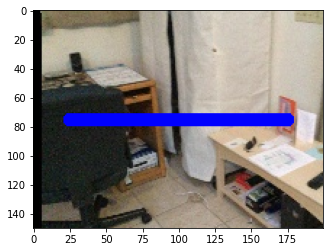

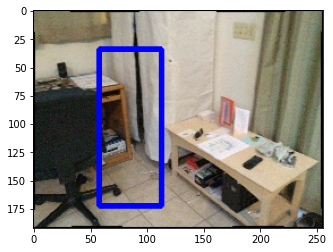

(576, 768, 3)
[222 205 461 385]


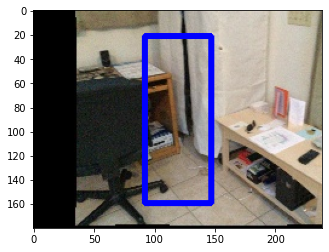

In [60]:
for k in range(20):

    img = cv2.imread('/scratches/octopus_2/fml35/datasets/own_data/classifier_T_from_lines/data_02/train/images_256_192/scene0000_00-000000.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    bbox = np.random.randint(190,size=4)
    if not (bbox[2] > bbox[0] and bbox[3] > bbox[1]):
        continue
    draw_bbox(img,bbox)
    plt.imshow(img)
    plt.show()

    crop_indices = get_crop_indices(bbox,np.array([img.shape[1],img.shape[0]]))
    black_background = np.zeros((img.shape[0]*3,img.shape[1]*3,img.shape[2]),dtype=np.uint8)
    black_background[img.shape[0]:img.shape[0]*2,img.shape[1]:img.shape[1]*2,:] = img
    img_cropped = black_background[crop_indices[1]:crop_indices[3],crop_indices[0]:crop_indices[2],:]


    plt.imshow(img_cropped)
    plt.show()

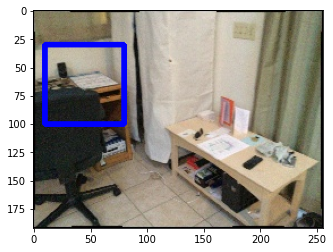

In [34]:
draw_bbox(img,bbox)
plt.imshow(img)
plt.show()